## **Project : Estimation of Energy Usage by Accelerometric Analysis Methodology**

*Our study proposes an approach: precisely characterising the energy usage of different exercises using an AX3 accelerometer, we will dissect the biomechanical characteristics of three emblematic exercises: boxing, running and jumping jacks.* 

### 1. Data collection and pre-processing

##### **Packages**


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install scipy

2332.23s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Note: you may need to restart the kernel to use updated packages.


##### **Reading data**

In [ ]:
import pandas as pd
import os

# Define the path to the ‘DATA’ folder (one level up from ‘NOTEBOOKS’)
data_dir = os.path.join(os.getcwd(), '..', 'DATA')  # ".." to move up a level

#  Define full file paths
filename1 = os.path.join(data_dir, 'running_DATA.resampled.csv')
filename2 = os.path.join(data_dir, 'boxe_DATA.resampled.csv')
filename3 = os.path.join(data_dir, 'jump_DATA.resampled.csv')

acc_run = pd.read_csv(filename1,sep=",") # running accelerometrer data
acc_box = pd.read_csv(filename2,sep=",") # boxing accelerometrer data
acc_jump = pd.read_csv(filename3,sep=",") # jumping jacks accelerometrer data


In [188]:
print(acc_run)
print(acc_box)
print(acc_jump)

                          Time  Accel-X (g)   Accel-Y (g)   Accel-Z (g)
0      2024-11-26 22:30:00.000     0.000000      0.000000      0.000000
1      2024-11-26 22:30:00.009     0.000000      0.000000      0.000000
2      2024-11-26 22:30:00.019     0.000000      0.000000      0.000000
3      2024-11-26 22:30:00.029     0.000000      0.000000      0.000000
4      2024-11-26 22:30:00.039     0.000000      0.000000      0.000000
...                        ...          ...           ...           ...
89995  2024-11-26 22:44:59.950    -0.972168      0.244141     -0.270264
89996  2024-11-26 22:44:59.960    -0.890381      0.205566     -0.285400
89997  2024-11-26 22:44:59.970    -0.821777      0.171387     -0.274170
89998  2024-11-26 22:44:59.980    -0.779785      0.126221     -0.239502
89999  2024-11-26 22:44:59.990    -0.734131      0.102295     -0.205078

[90000 rows x 4 columns]
                          Time  Accel-X (g)   Accel-Y (g)   Accel-Z (g)
0      2024-11-26 23:23:00.000     0.0

##### **Plot data**

<Axes: >

<Figure size 1900x600 with 0 Axes>

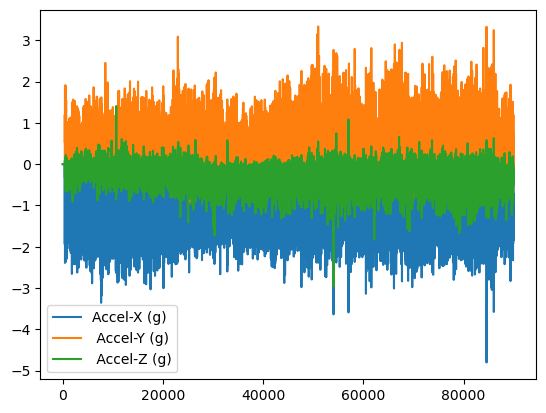

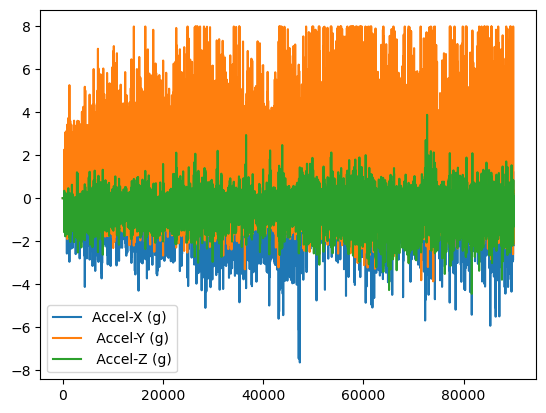

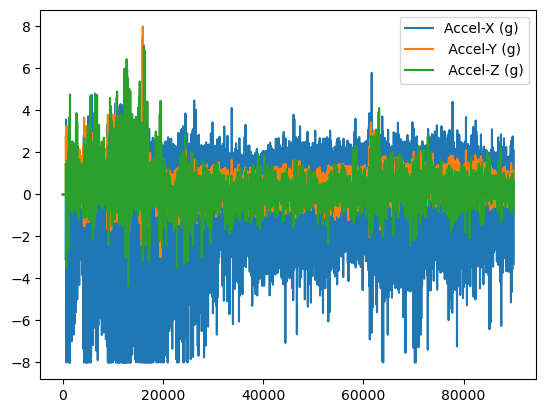

In [189]:
import matplotlib.pyplot as plt # for plotting and graphing data

plt.figure(figsize=(19,6))

acc_run.plot()
acc_box.plot()
acc_jump.plot()

##### **Scaling**

In [195]:
# Add new columns for the filter
acc_run['filtered_Accel_X']=""
acc_run['filtered_Accel_Y']=""
acc_run['filtered_Accel_Z']=""
acc_box['filtered_Accel_X']=""
acc_box['filtered_Accel_Y']=""
acc_box['filtered_Accel_Z']=""
acc_jump['filtered_Accel_X']=""
acc_jump['filtered_Accel_Y']=""
acc_jump['filtered_Accel_Z']=""



In [191]:
def scaling (acc_data): 
    acc_data.columns = ['Time', 'Accel-X (g)', 'Accel-Y (g)','Accel-Z (g)','filtered_Accel_X', 'filtered_Accel_Y','filtered_Accel_Z']
    acc_ = acc_data.drop('Time', axis=1)
    acc_time = acc_data[['Time']]
    acc_x = acc_data[['Accel-X (g)']]
    acc_y = acc_data[['Accel-Y (g)']]
    acc_z = acc_data[['Accel-Z (g)']]
    
    return acc_time,acc_,acc_x,acc_y,acc_z


In [192]:
# Scaling function
acc_time,Acc_run,Acc_xR,Acc_yR,Acc_zR=scaling(acc_run)
acc_time,Acc_box,Acc_xB,Acc_yB,Acc_zB=scaling(acc_box)
acc_time,Acc_jump,Acc_xJ,Acc_yJ,Acc_zJ=scaling(acc_jump)

In [193]:
import numpy as np
np.shape(acc_run)

(90000, 7)

In [ ]:
import numpy as np
duration = 90000 / 100  # sampled at 100 
print(duration)
time = np.linspace(0, duration, 90000)
print(time)

900.0
[0.00000000e+00 1.00001111e-02 2.00002222e-02 ... 8.99980000e+02
 8.99990000e+02 9.00000000e+02]


### 2. Visualisation and analysis

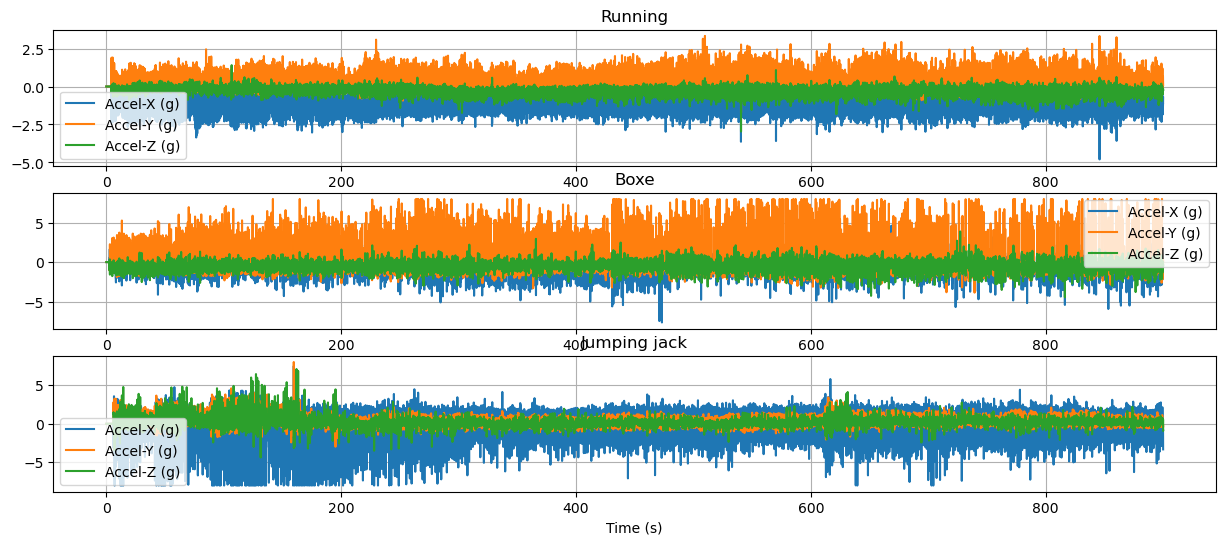

In [ ]:
import matplotlib.pyplot as plt # to plot and display data in graphical form

plt.figure(figsize=(15,6))

plt.subplot(3,1,1)

plt.plot(time,Acc_xR)
plt.plot(time,Acc_yR)
plt.plot(time,Acc_zR)
plt.xlabel('Time (s)') 
plt.ylabel('') 
plt.title('Running')
plt.gca().legend(('Accel-X (g)','Accel-Y (g)','Accel-Z (g)'))
plt.grid()

plt.subplot(3,1,2)

plt.plot(time,Acc_xB)
plt.plot(time,Acc_yB)
plt.plot(time,Acc_zB)
plt.xlabel('Time (s)') 
plt.ylabel('') 
plt.title('Boxe')
plt.gca().legend(('Accel-X (g)','Accel-Y (g)','Accel-Z (g)'))
plt.grid()

plt.subplot(3,1,3)

plt.plot(time,Acc_xJ)
plt.plot(time,Acc_yJ)
plt.plot(time,Acc_zJ)
plt.xlabel('Time (s)') 
plt.ylabel('') 
plt.title('Jumping jack')
plt.gca().legend(('Accel-X (g)','Accel-Y (g)','Accel-Z (g)'))
plt.grid()

##### **Filter**

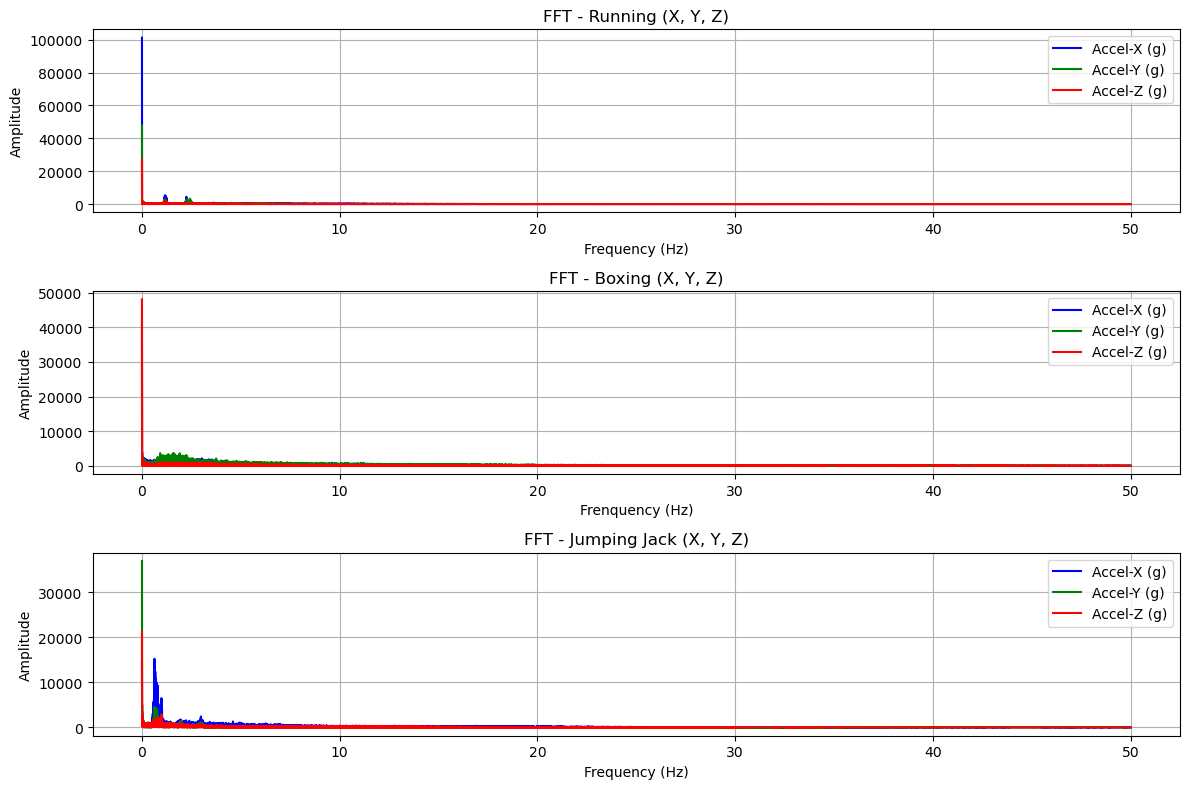

In [198]:
# Visualisation of dominant frequencies

import numpy as np
import matplotlib.pyplot as plt


fs = 100  # rate

# FFT application
fft_run_x = np.fft.fft(Acc_run['Accel-X (g)'])
fft_run_y = np.fft.fft(Acc_run['Accel-Y (g)'])
fft_run_z = np.fft.fft(Acc_run['Accel-Z (g)'])

fft_box_x = np.fft.fft(Acc_box['Accel-X (g)'])
fft_box_y = np.fft.fft(Acc_box['Accel-Y (g)'])
fft_box_z = np.fft.fft(Acc_box['Accel-Z (g)'])

fft_jump_x = np.fft.fft(Acc_jump['Accel-X (g)'])
fft_jump_y = np.fft.fft(Acc_jump['Accel-Y (g)'])
fft_jump_z = np.fft.fft(Acc_jump['Accel-Z (g)'])


frequencies = np.fft.fftfreq(len(Acc_run['Accel-X (g)']), 1/fs)

# plot
plt.figure(figsize=(12, 8))


plt.subplot(3, 1, 1)
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_run_x)[:len(frequencies)//2], label='Accel-X (g)', color='blue')
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_run_y)[:len(frequencies)//2], label='Accel-Y (g)', color='green')
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_run_z)[:len(frequencies)//2], label='Accel-Z (g)', color='red')


plt.title('FFT - Running (X, Y, Z)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()


plt.subplot(3, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_box_x)[:len(frequencies)//2], label='Accel-X (g)', color='blue')
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_box_y)[:len(frequencies)//2], label='Accel-Y (g)', color='green')
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_box_z)[:len(frequencies)//2], label='Accel-Z (g)', color='red')

plt.title('FFT - Boxing (X, Y, Z)')
plt.xlabel('Frenquency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()


plt.subplot(3, 1, 3)
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_jump_x)[:len(frequencies)//2], label='Accel-X (g)', color='blue')
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_jump_y)[:len(frequencies)//2], label='Accel-Y (g)', color='green')
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_jump_z)[:len(frequencies)//2], label='Accel-Z (g)', color='red')


plt.title('FFT - Jumping Jack (X, Y, Z)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


                          Time  Accel-X (g)  Accel-Y (g)  Accel-Z (g)  \
0      2024-11-26 22:30:00.000     0.000000     0.000000     0.000000   
1      2024-11-26 22:30:00.009     0.000000     0.000000     0.000000   
2      2024-11-26 22:30:00.019     0.000000     0.000000     0.000000   
3      2024-11-26 22:30:00.029     0.000000     0.000000     0.000000   
4      2024-11-26 22:30:00.039     0.000000     0.000000     0.000000   
...                        ...          ...          ...          ...   
89995  2024-11-26 22:44:59.950    -0.972168     0.244141    -0.270264   
89996  2024-11-26 22:44:59.960    -0.890381     0.205566    -0.285400   
89997  2024-11-26 22:44:59.970    -0.821777     0.171387    -0.274170   
89998  2024-11-26 22:44:59.980    -0.779785     0.126221    -0.239502   
89999  2024-11-26 22:44:59.990    -0.734131     0.102295    -0.205078   

       filtered_Accel_X  filtered_Accel_Y  filtered_Accel_Z  
0          5.432318e-22     -2.814477e-22      1.141478e-22  

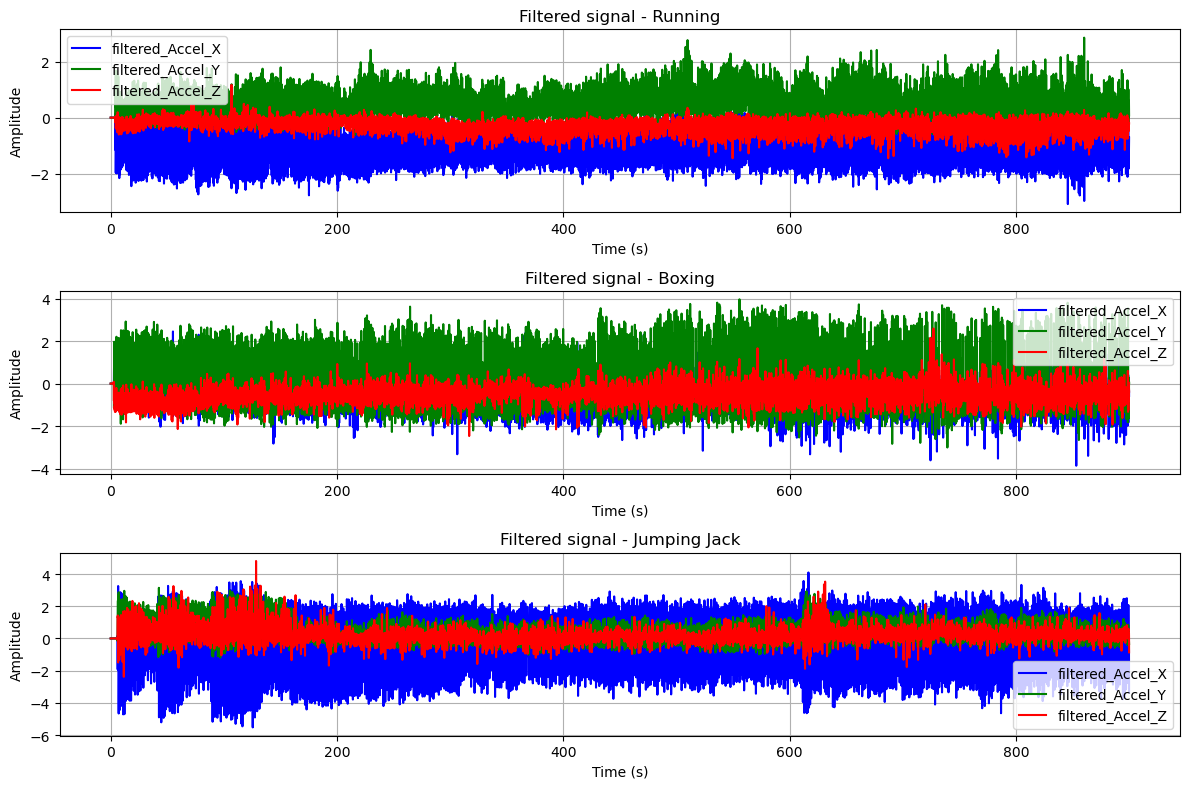

In [ ]:
# Application of the low-pass filter (butterworth)
from scipy.signal import butter, filtfilt


cutoff_frequency = 10
fs = 100  # Sampling frequency


def butter_lowpass(cutoff, fs, order=4):
    nyquist = 0.5 * fs  
    normal_cutoff = cutoff / nyquist  
    b, a = butter(order, normal_cutoff, btype='low', analog=False)  
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=4):
    b, a = butter_lowpass(cutoff, fs, order)  
    y = filtfilt(b, a, data)  
    return y


# Filter settings
fs = 100  #  rate (Hz)
cutoff_frequency = 5.0  # Filter cut-off frequency (en Hz)

acc_run['filtered_Accel_X'] = butter_lowpass_filter(Acc_run['Accel-X (g)'], cutoff_frequency, fs)
acc_run['filtered_Accel_Y'] = butter_lowpass_filter(Acc_run['Accel-Y (g)'], cutoff_frequency, fs)
acc_run['filtered_Accel_Z'] = butter_lowpass_filter(Acc_run['Accel-Z (g)'], cutoff_frequency, fs)
print(acc_run)

acc_box['filtered_Accel_X'] = butter_lowpass_filter(Acc_box['Accel-X (g)'], cutoff_frequency, fs)
acc_box['filtered_Accel_Y'] =  butter_lowpass_filter(Acc_box['Accel-Y (g)'], cutoff_frequency, fs)
acc_box['filtered_Accel_Z'] = butter_lowpass_filter(Acc_box['Accel-Z (g)'], cutoff_frequency, fs)


acc_jump['filtered_Accel_X'] = butter_lowpass_filter(Acc_jump['Accel-X (g)'], cutoff_frequency, fs)
acc_jump['filtered_Accel_Y'] = butter_lowpass_filter(Acc_jump['Accel-Y (g)'], cutoff_frequency, fs)
acc_jump['filtered_Accel_Z']= butter_lowpass_filter(Acc_jump['Accel-Z (g)'], cutoff_frequency, fs)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(time, acc_run['filtered_Accel_X'] , label='filtered_Accel_X', color='blue')  
plt.plot(time, acc_run['filtered_Accel_Y'] , label='filtered_Accel_Y', color='green') 
plt.plot(time, acc_run['filtered_Accel_Z'] , label='filtered_Accel_Z', color='red')   

plt.title('Filtered signal - Running')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(time, acc_box['filtered_Accel_X'], label='filtered_Accel_X', color='blue')  
plt.plot(time, acc_box['filtered_Accel_Y'], label='filtered_Accel_Y', color='green') 
plt.plot(time, acc_box['filtered_Accel_Z'], label='filtered_Accel_Z', color='red')  

plt.title('Filtered signal - Boxing')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(time, acc_jump['filtered_Accel_X'], label='filtered_Accel_X', color='blue')  
plt.plot(time, acc_jump['filtered_Accel_Y'], label='filtered_Accel_Y', color='green') 
plt.plot(time, acc_jump['filtered_Accel_Z'], label='filtered_Accel_Z', color='red')  

plt.title('Filtered signal - Jumping Jack')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()




##### **Count of duration in each intensity level** 

In [201]:
import numpy as np
import pandas as pd

# Example data (replace with your actual filtered signals)
running_signal = pd.DataFrame({
    "time": np.linspace(0, 900, 90000),
    "Accel_X": np.random.uniform(-2, 2, 90000),
    "Accel_Y": np.random.uniform(-4, 4, 90000),
    "Accel_Z": np.random.uniform(-3, 3, 90000)
})

boxing_signal = pd.DataFrame({
    "time": np.linspace(0, 900, 90000),
    "Accel_X": np.random.uniform(-1, 1, 90000),
    "Accel_Y": np.random.uniform(-3, 3, 90000),
    "Accel_Z": np.random.uniform(-2, 2, 90000)
})

jumping_signal = pd.DataFrame({
    "time": np.linspace(0, 900, 90000),
    "Accel_X": np.random.uniform(-3, 3, 90000),
    "Accel_Y": np.random.uniform(-4, 4, 90000),
    "Accel_Z": np.random.uniform(-2, 2, 90000)
})

# Define intensity thresholds for each activity
thresholds = {
    "Running": {"Low": 1, "Moderate": 2},
    "Boxe": {"Low": 0.5, "Moderate": 1.5},
    "Jump": {"Low": 1.5, "Moderate": 3}
}

# Function to calculate durations for each intensity level
def calculate_durations(signal, axis, low_thresh, moderate_thresh):
    low_duration = 0
    moderate_duration = 0
    high_duration = 0

    for i in range(len(signal) - 1):
        value = abs(signal[axis].iloc[i])
        dt = signal["time"].iloc[i + 1] - signal["time"].iloc[i]

        if value < low_thresh:
            low_duration += dt
        elif low_thresh <= value < moderate_thresh:
            moderate_duration += dt
        else:
            high_duration += dt

    return low_duration, moderate_duration, high_duration

# Analyze signals for all activities
activities = {
    "Running": running_signal,
    "Boxe": boxing_signal,
    "Jump": jumping_signal
}

results = []

for activity, signal in activities.items():
    low_thresh = thresholds[activity]["Low"]
    moderate_thresh = thresholds[activity]["Moderate"]

    for axis in ["Accel_X", "Accel_Y", "Accel_Z"]:
        low, moderate, high = calculate_durations(signal, axis, low_thresh, moderate_thresh)
        results.append({
            "Activity": activity,
            "Signal": axis,
            "Low Intensity (s)": low,
            "Moderate Intensity (s)": moderate,
            "High Intensity (s)": high
        })

results_table = pd.DataFrame(results)


def style_results_table(df):
    styled = (
        df.style
        .background_gradient(subset=["Low Intensity (s)"], cmap="Blues")  # Blue gradient for Low
        .background_gradient(subset=["Moderate Intensity (s)"], cmap="Greens")  # Green gradient for Moderate
        .background_gradient(subset=["High Intensity (s)"], cmap="Reds")  # Red gradient for High
        .set_properties(**{
            'border': '1px solid black',  # Add border to all cells
            'text-align': 'center'  # Center-align text
        })
        .set_table_styles([
            {'selector': 'thead th', 'props': [('background-color', '#D3D3D3'), ('color', 'black'), ('border', '1px solid black')]}
        ])  # Style the header
    )
    return styled


styled_results = style_results_table(results_table)

styled_results


,Activity,Signal,Low Intensity (s),Moderate Intensity (s),High Intensity (s)
0,Running,Accel_X,450.125001,449.874999,0.000000
1,Running,Accel_Y,225.282503,225.522506,449.194991
2,Running,Accel_Z,300.543339,298.733319,300.723341
3,Boxe,Accel_X,449.554995,450.445005,0.000000
4,Boxe,Accel_Y,149.731664,302.303359,447.964977
5,Boxe,Accel_Z,227.012522,449.514995,223.472483
6,Jump,Accel_X,449.784998,450.215002,0.000000
7,Jump,Accel_Y,339.213769,336.923744,223.862487
8,Jump,Accel_Z,674.887499,225.112501,0.000000


In [202]:
# Calculate descriptive statistics for Running, Boxing, Jumping Jack
activities = {"Running": running_signal, "Boxe": boxing_signal, "Jump": jumping_signal}

for activity_name, signal_data in activities.items():
    print(f"Statistiques pour {activity_name}:")
    print(signal_data[["Accel_X", "Accel_Y", "Accel_Z"]].describe(percentiles=[0.25, 0.5, 0.75]))
    print("\n")


Statistiques pour Running:
            Accel_X       Accel_Y       Accel_Z
count  90000.000000  90000.000000  90000.000000
mean      -0.000491      0.007474      0.006994
std        1.153379      2.308263      1.734088
min       -1.999978     -3.999962     -2.999986
25%       -0.999181     -1.993439     -1.498384
50%        0.003064      0.007679      0.010259
75%        1.000140      1.999041      1.506026
max        1.999968      3.999915      2.999876


Statistiques pour Boxe:
            Accel_X       Accel_Y       Accel_Z
count  90000.000000  90000.000000  90000.000000
mean      -0.001018     -0.004191      0.005246
std        0.577042      1.730107      1.152410
min       -0.999996     -2.999813     -1.999998
25%       -0.502224     -1.496832     -0.993610
50%       -0.001627     -0.001257      0.010004
75%        0.498846      1.490426      1.001713
max        0.999989      2.999922      1.999993


Statistiques pour Jump:
            Accel_X       Accel_Y       Accel_Z
count  90

##### **ENMO « Euclidian Norm Minus One »**

√(x² + y² + z²) − 1 (avec 1 valeur de gravité)

https://www.sciencedirect.com/science/article/pii/S0398762018314858

In [25]:
def ENMO (acc_data):
    acc_data['ENMO'] = np.sqrt(acc_data['filtered_Accel_X']**2 + acc_data['filtered_Accel_Y']**2 + acc_data['filtered_Accel_Z']**2) - 1  # formula
    acc_data['ENMO'] = acc_data['ENMO'].clip(lower=0)  # data normalisation 
    ENMO=acc_data[['ENMO']]
    return ENMO

In [49]:
# ENMO function
ENMO_run=scaling(acc_run)
ENMO_box=scaling(acc_box)
ENMO_jump=scaling(acc_jump)

In [28]:
ENMO_run = ENMO(acc_run)
ENMO_box = ENMO(acc_box)
ENMO_jump = ENMO(acc_jump)

In [ ]:
ENMO_run

,ENMO
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
89995,0.030213
89996,0.000000
89997,0.000000
89998,0.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


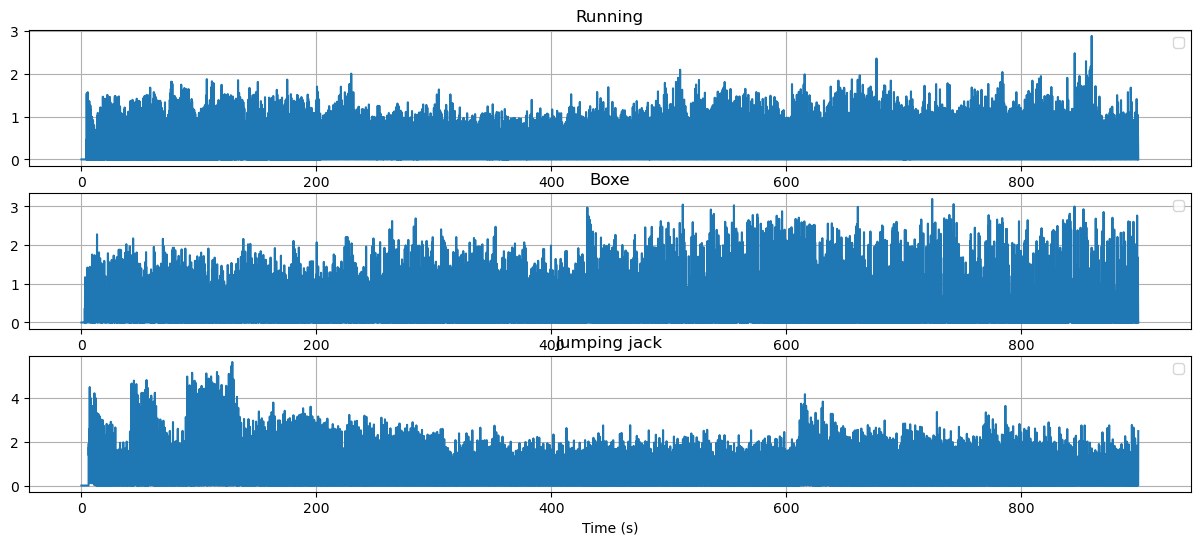

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))

plt.subplot(3,1,1)

plt.plot(time,ENMO_run)
plt.xlabel('Time (s)') 
plt.ylabel('') 
plt.title('Running')
plt.gca().legend()
plt.grid()

plt.subplot(3,1,2)

plt.plot(time,ENMO_box)
plt.xlabel('Time (s)') 
plt.ylabel('') 
plt.title('Boxe')
plt.gca().legend()
plt.grid()

plt.subplot(3,1,3)

plt.plot(time,ENMO_jump)
plt.xlabel('Time (s)') 
plt.ylabel('') 
plt.title('Jumping jack')
plt.gca().legend()
plt.grid()


##### **Integration over EPOCH**

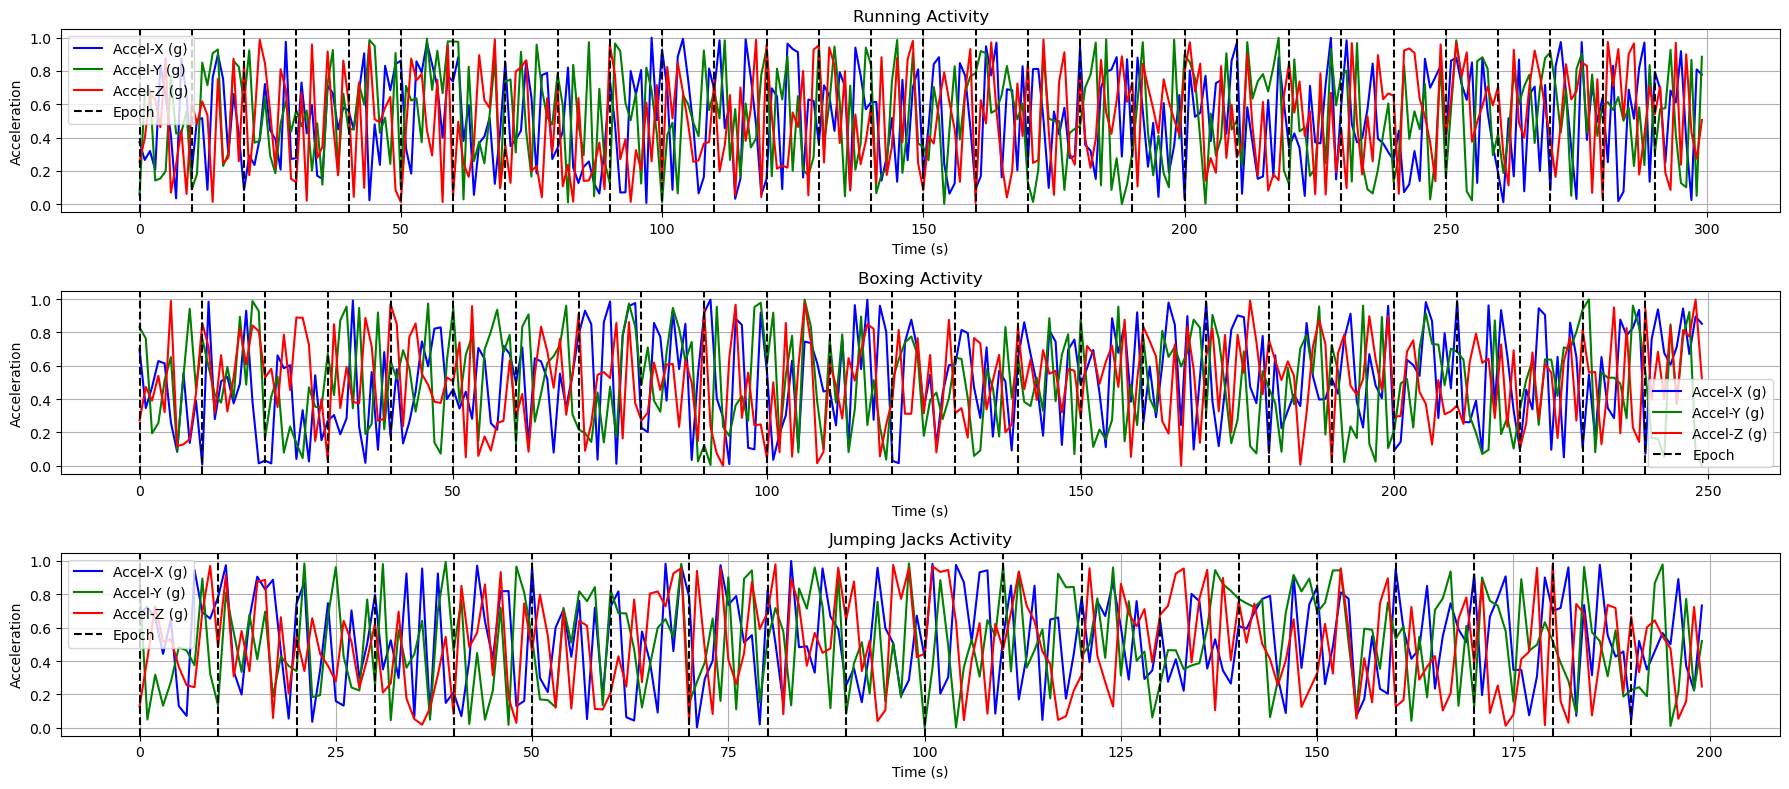

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


time_run = np.arange(0, 300, 1)  
time_box = np.arange(0, 250, 1)  
time_jump = np.arange(0, 200, 1)  


Acc_run = np.random.rand(len(time_run), 3)  
Acc_box = np.random.rand(len(time_box), 3)  
Acc_jump = np.random.rand(len(time_jump), 3)  


epoch_size = 10


epochs_run = np.arange(0, len(time_run), epoch_size)
epochs_box = np.arange(0, len(time_box), epoch_size)
epochs_jump = np.arange(0, len(time_jump), epoch_size)


plt.figure(figsize=(18, 8))


plt.subplot(3, 1, 1)
plt.plot(time_run, Acc_run[:, 0], label='Accel-X (g)', color='blue')
plt.plot(time_run, Acc_run[:, 1], label='Accel-Y (g)', color='green')
plt.plot(time_run, Acc_run[:, 2], label='Accel-Z (g)', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.title('Running Activity')
for epoch in epochs_run:
    plt.axvline(x=epoch, color='black', linestyle='--', label='Epoch' if epoch == epochs_run[0] else "")  
plt.legend()
plt.grid()


plt.subplot(3, 1, 2)
plt.plot(time_box, Acc_box[:, 0], label='Accel-X (g)', color='blue')
plt.plot(time_box, Acc_box[:, 1], label='Accel-Y (g)', color='green')
plt.plot(time_box, Acc_box[:, 2], label='Accel-Z (g)', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.title('Boxing Activity')
for epoch in epochs_box:
    plt.axvline(x=epoch, color='black', linestyle='--', label='Epoch' if epoch == epochs_box[0] else "")  
plt.legend()
plt.grid()


plt.subplot(3, 1, 3)
plt.plot(time_jump, Acc_jump[:, 0], label='Accel-X (g)', color='blue')
plt.plot(time_jump, Acc_jump[:, 1], label='Accel-Y (g)', color='green')
plt.plot(time_jump, Acc_jump[:, 2], label='Accel-Z (g)', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration')
plt.title('Jumping Jacks Activity')
for epoch in epochs_jump:
    plt.axvline(x=epoch, color='black', linestyle='--', label='Epoch' if epoch == epochs_jump[0] else "")  
plt.legend()
plt.grid()


plt.tight_layout()
plt.show()







####  3. Estimated energy costs

##### **Calculating vector magnitude (VM)**

In [ ]:
# Calculating vector magnitude (VM)
acc_run['vm'] = np.sqrt(acc_run['filtered_Accel_X']**2 + acc_run['filtered_Accel_Y']**2 + acc_run['filtered_Accel_Z']**2)
acc_box['vm'] = np.sqrt(acc_box['filtered_Accel_X']**2 + acc_box['filtered_Accel_Y']**2 + acc_box['filtered_Accel_Z']**2)
acc_jump['vm'] = np.sqrt(acc_jump['filtered_Accel_X']**2 + acc_jump['filtered_Accel_Y']**2 + acc_jump['filtered_Accel_Z']**2)

#View of pre-processed data
acc_run
acc_box
acc_jump

,Time,Accel-X (g),Accel-Y (g),Accel-Z (g),filtered_Accel_X,filtered_Accel_Y,filtered_Accel_Z,vm
0,2024-11-26 23:46:00.000,0.000000,0.000000,0.000000,1.034963e-32,-8.909565e-33,-6.301252e-33,1.503998e-32
1,2024-11-26 23:46:00.009,0.000000,0.000000,0.000000,6.873013e-33,-5.033390e-33,-5.258366e-33,1.001118e-32
2,2024-11-26 23:46:00.019,0.000000,0.000000,0.000000,1.700852e-33,4.412784e-34,-3.351987e-33,3.784632e-33
3,2024-11-26 23:46:00.029,0.000000,0.000000,0.000000,-5.047464e-33,7.335435e-33,-5.621362e-34,8.921967e-33
4,2024-11-26 23:46:00.039,0.000000,0.000000,0.000000,-1.304554e-32,1.526448e-32,3.038445e-33,2.030819e-32
...,...,...,...,...,...,...,...,...
89995,2024-11-27 00:00:59.950,-1.490479,-0.382324,0.502441,-1.818738e+00,-2.570209e-01,-3.883541e-02,1.837220e+00
89996,2024-11-27 00:00:59.960,-1.997803,-0.457275,0.069336,-2.179313e+00,-2.795726e-01,-2.138475e-01,2.207555e+00
89997,2024-11-27 00:00:59.970,-2.551514,-0.356201,-0.531738,-2.565728e+00,-3.014555e-01,-4.146078e-01,2.616436e+00
89998,2024-11-27 00:00:59.980,-3.076660,-0.197754,-0.932617,-2.967222e+00,-3.222734e-01,-6.332955e-01,3.051120e+00


##### **Feature extraction**

Divide the data into time windows to calculate the characteristics.

In [ ]:
# segmentation parameters
window_size = 1000 # 10 s x 100hz = 1000 points
stride = 500 # overlapping windows (1000/2)

def feature (data):
    # List for storing characteristics
    features = []

    # Feature extraction
    for start in range(0, len(data) - window_size, stride):
        window = data.iloc[start:start + window_size]
        mean_vm = window['vm'].mean()
        std_vm = window['vm'].std()
        features.append([mean_vm, std_vm])

    # DataFrame conversion
    features = pd.DataFrame(features, columns=['mean_vm', 'std_vm'])

    return features

In [261]:
feature_run = feature(acc_run)
feature_jump = feature(acc_jump)
feature_box = feature(acc_box)

In [262]:
print(feature_run)

      mean_vm    std_vm
0    0.755528  0.765528
1    1.181783  0.514685
2    1.181380  0.534103
3    1.268048  0.654101
4    1.276776  0.676186
..        ...       ...
173  1.382705  0.549865
174  1.357896  0.540934
175  1.360675  0.539151
176  1.346989  0.521756
177  1.406294  0.518113

[178 rows x 2 columns]


In [263]:
feature_box

,mean_vm,std_vm
0,0.954161,0.664365
1,1.394810,0.441891
2,1.379477,0.443822
3,1.319452,0.387342
4,1.351623,0.417049
...,...,...
173,1.349973,0.576986
174,1.493827,0.644581
175,1.451890,0.626985
176,1.378009,0.611722


In [264]:
feature_jump

,mean_vm,std_vm
0,1.012804,1.370853
1,2.234758,1.184414
2,2.243620,0.990087
3,2.013230,0.889886
4,1.884027,0.850525
...,...,...
173,1.253194,0.824083
174,1.300167,0.838200
175,1.225062,0.800881
176,1.172773,0.744298


##### **METs estimation**

In [ ]:
# Function for estimating METs as a function of mean_vm and std_vm
def estimate_mets(features):
    # Coefficients based on activity intensity
    features['METs'] = 1.5 * features['mean_vm'] + 1 * features['std_vm']  #  to be adjusted according to performance
    return features

feature_run = estimate_mets(feature_run)
feature_jump = estimate_mets(feature_jump)
feature_box = estimate_mets(feature_box)

# Displaying results
print(feature_run[['mean_vm', 'std_vm', 'METs']].head())
print(feature_jump[['mean_vm', 'std_vm', 'METs']].head())
print(feature_box[['mean_vm', 'std_vm', 'METs']].head())

    mean_vm    std_vm      METs
0  0.755528  0.765528  1.898821
1  1.181783  0.514685  2.287359
2  1.181380  0.534103  2.306174
3  1.268048  0.654101  2.556173
4  1.276776  0.676186  2.591349
    mean_vm    std_vm      METs
0  1.012804  1.370853  2.890059
1  2.234758  1.184414  4.536550
2  2.243620  0.990087  4.355518
3  2.013230  0.889886  3.909731
4  1.884027  0.850525  3.676566
    mean_vm    std_vm      METs
0  0.954161  0.664365  2.095607
1  1.394810  0.441891  2.534106
2  1.379477  0.443822  2.513038
3  1.319452  0.387342  2.366519
4  1.351623  0.417049  2.444484


##### **Energy expenditure in kcal/min**

In [ ]:
# Participant weight (in kg)
weight_kg = 68

# Calculation of energy expenditure in kcal/min
feature_run['kcal_per_min'] = feature_run['METs'] * weight_kg * 0.0175
feature_jump['kcal_per_min'] = feature_jump['METs'] * weight_kg * 0.0175
feature_box['kcal_per_min'] = feature_box['METs'] * weight_kg *  0.0175

# Displaying results
print(feature_run[['mean_vm', 'std_vm', 'METs', 'kcal_per_min']].head())
print(feature_jump[['mean_vm', 'std_vm', 'METs', 'kcal_per_min']].head())
print(feature_box[['mean_vm', 'std_vm', 'METs', 'kcal_per_min']].head())


    mean_vm    std_vm      METs  kcal_per_min
0  0.755528  0.765528  1.898821      2.259597
1  1.181783  0.514685  2.287359      2.721957
2  1.181380  0.534103  2.306174      2.744347
3  1.268048  0.654101  2.556173      3.041846
4  1.276776  0.676186  2.591349      3.083706
    mean_vm    std_vm      METs  kcal_per_min
0  1.012804  1.370853  2.890059      3.439170
1  2.234758  1.184414  4.536550      5.398495
2  2.243620  0.990087  4.355518      5.183066
3  2.013230  0.889886  3.909731      4.652580
4  1.884027  0.850525  3.676566      4.375113
    mean_vm    std_vm      METs  kcal_per_min
0  0.954161  0.664365  2.095607      2.493772
1  1.394810  0.441891  2.534106      3.015587
2  1.379477  0.443822  2.513038      2.990515
3  1.319452  0.387342  2.366519      2.816158
4  1.351623  0.417049  2.444484      2.908936


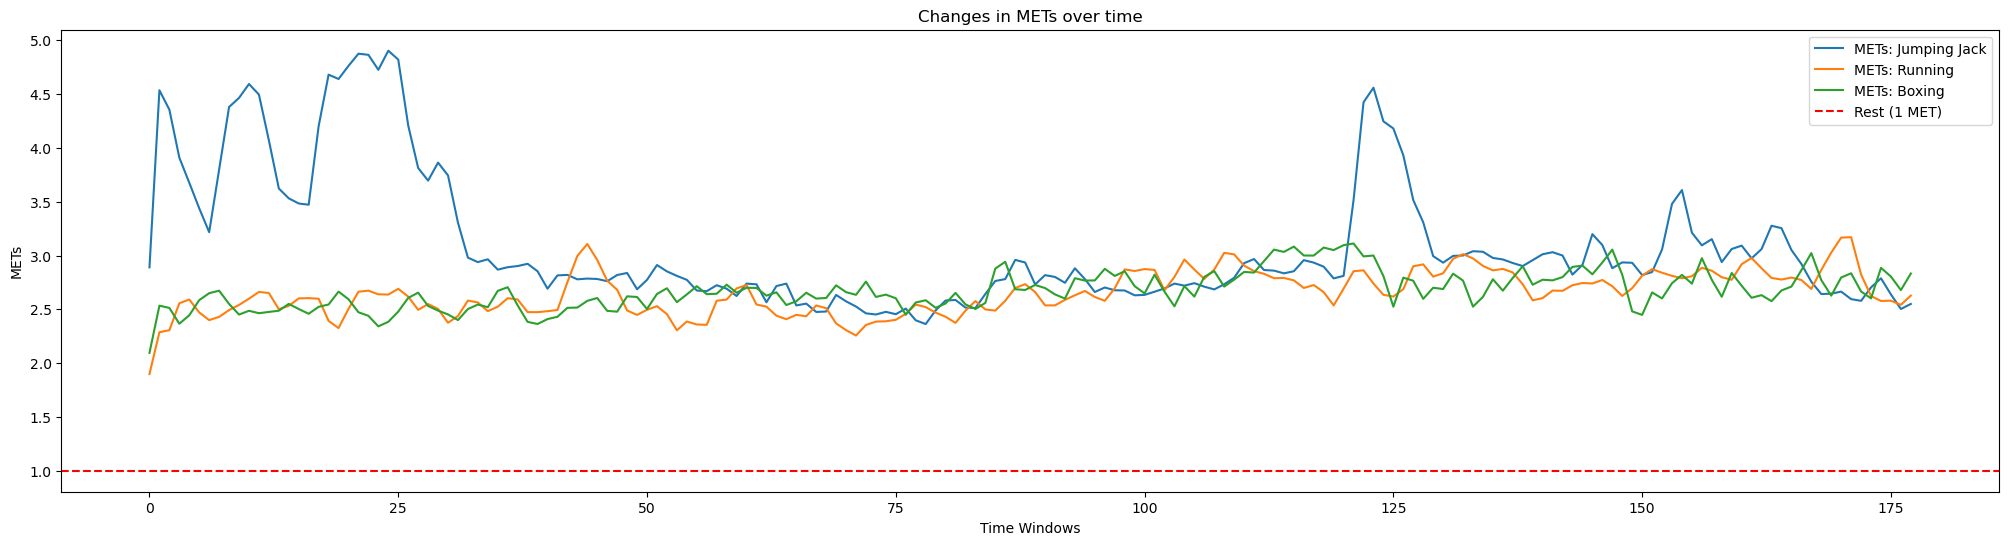

In [308]:
import matplotlib.pyplot as plt

# Plotting METs for each activity
plt.figure(figsize=(25, 6))
plt.plot(feature_jump['METs'], label='METs: Jumping Jack')
plt.plot(feature_run['METs'], label='METs: Running')
plt.plot(feature_box['METs'], label='METs: Boxing')
plt.axhline(y=1, color='r', linestyle='--', label='Rest (1 MET)')
plt.xlabel('Time Windows')
plt.ylabel('METs')
plt.title('Changes in METs over time')
plt.legend()
plt.show()


##### **Modelisation**

Use linear regression to estimate energy expenditure.

In [ ]:
# SSimulate an energy expenditure output randomly around the values obtained
np.random.seed(42)
feature_run['energy'] = feature_run['mean_vm'] * 1.5 + feature_run['std_vm'] * 1 + np.random.normal(0, 0.1, len(feature_run))
feature_jump['energy'] = feature_jump['mean_vm'] * 1.5 + feature_jump['std_vm'] * 1 + np.random.normal(0, 0.1, len(feature_jump))
feature_box['energy'] = feature_box['mean_vm'] * 1.5 + feature_box['std_vm'] * 1 + np.random.normal(0, 0.1, len(feature_box))



In [300]:
print(feature_run)
print(feature_jump)
print(feature_box)

      mean_vm    std_vm      METs  kcal_per_min    energy
0    0.755528  0.765528  1.898821      2.259597  1.948492
1    1.181783  0.514685  2.287359      2.721957  2.273532
2    1.181380  0.534103  2.306174      2.744347  2.370943
3    1.268048  0.654101  2.556173      3.041846  2.708476
4    1.276776  0.676186  2.591349      3.083706  2.567934
..        ...       ...       ...           ...       ...
173  1.382705  0.549865  2.623922      3.122468  2.658038
174  1.357896  0.540934  2.577778      3.067556  2.605447
175  1.360675  0.539151  2.580164      3.070395  2.662882
176  1.346989  0.521756  2.542240      3.025265  2.543540
177  1.406294  0.518113  2.627553      3.126789  2.772907

[178 rows x 5 columns]
      mean_vm    std_vm      METs  kcal_per_min    energy
0    1.012804  1.370853  2.890059      3.439170  2.863593
1    2.234758  1.184414  4.536550      5.398495  4.808567
2    2.243620  0.990087  4.355518      5.183066  4.418085
3    2.013230  0.889886  3.909731      4.652580 

In [309]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#  Function for training and evaluating a regression model
def reg(features):
    X = features[['mean_vm', 'std_vm']]  # Features
    y = features['energy'] # Target 

    #  Separate data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Prediction
    y_pred = model.predict(X_test)

    # Evaluating the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")

    # Viewing results
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--', label='Perfect')
    plt.xlabel('Real Energy (kcal/min)')
    plt.ylabel('Predicted Energy(kcal/min)')
    plt.title('Comparison of Actual and Predicted Energies')
    plt.legend()
    plt.grid()
    plt.show()

    return mse, r2, y_test, y_pred



Mean Squared Error: 0.0087
R² Score: 0.7971


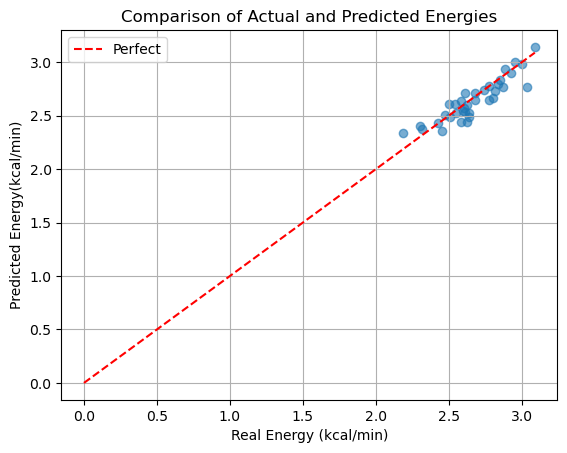

Mean Squared Error: 0.0117
R² Score: 0.9742


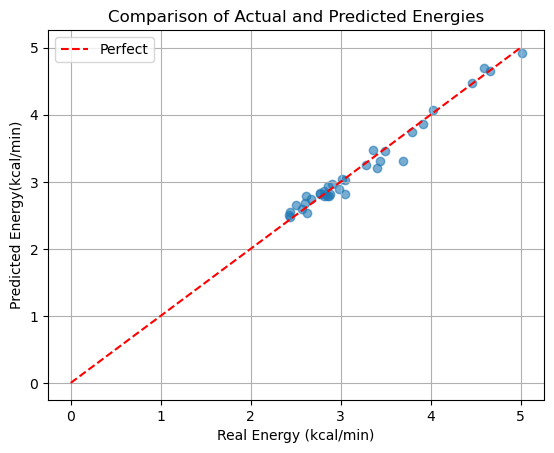

Mean Squared Error: 0.0124
R² Score: 0.7643


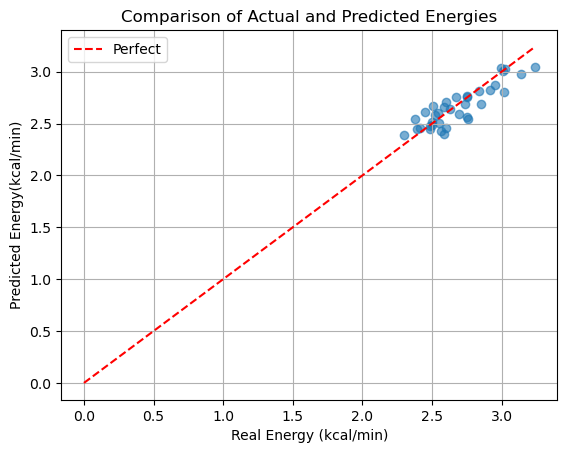

In [310]:
# Applying regression to the three activities
ms_run,r2_run,y_testR,y_predR = reg(feature_run)
ms_jump,r2_jump,y_testJ,y_predJ= reg(feature_jump)
ms_box,r2_box,y_testB,y_predB = reg(feature_box)


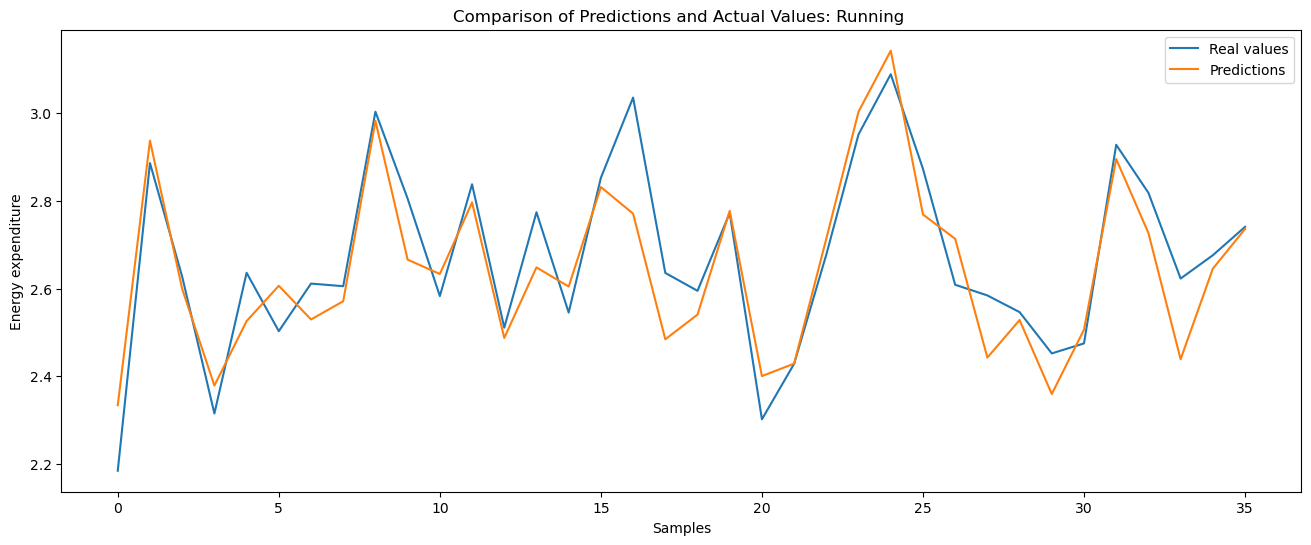

In [ ]:
# View predictions vs. actual values
plt.figure(figsize=(16, 6))
plt.plot(y_testR.values, label='Real values')
plt.plot(y_predR, label='Predictions')
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Energy expenditure')
plt.title('Comparison of Predictions and Actual Values: Running ')
plt.show()

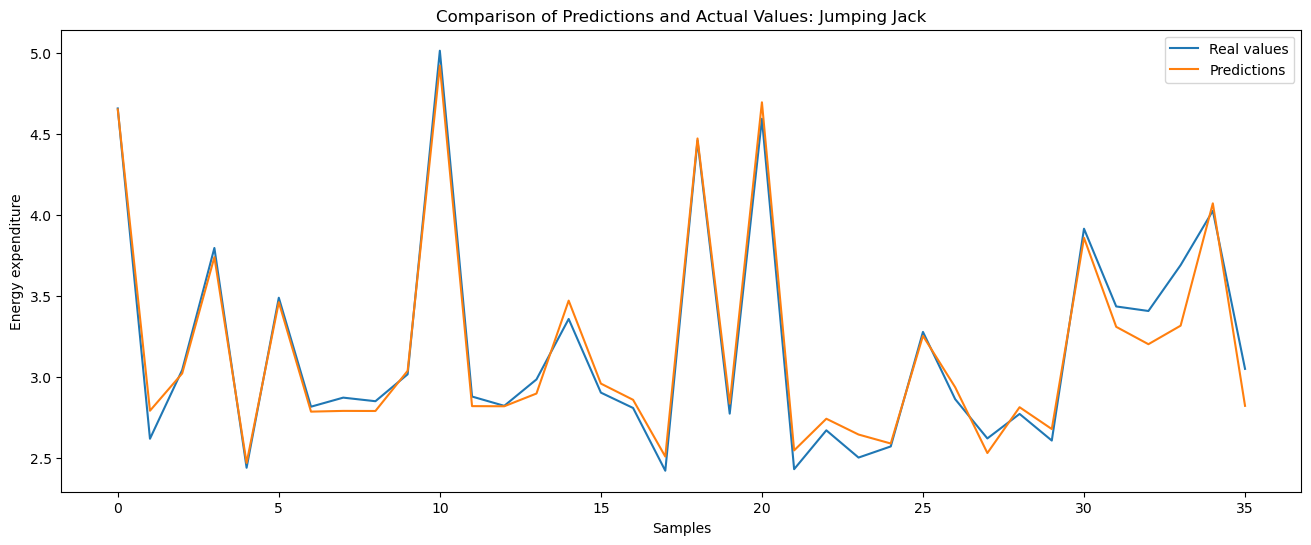

In [ ]:
# View predictions vs. actual values
plt.figure(figsize=(16, 6))
plt.plot(y_testJ.values, label='Real values')
plt.plot(y_predJ, label='Predictions')
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Energy expenditure')
plt.title('Comparison of Predictions and Actual Values: Jumping Jack')
plt.show()

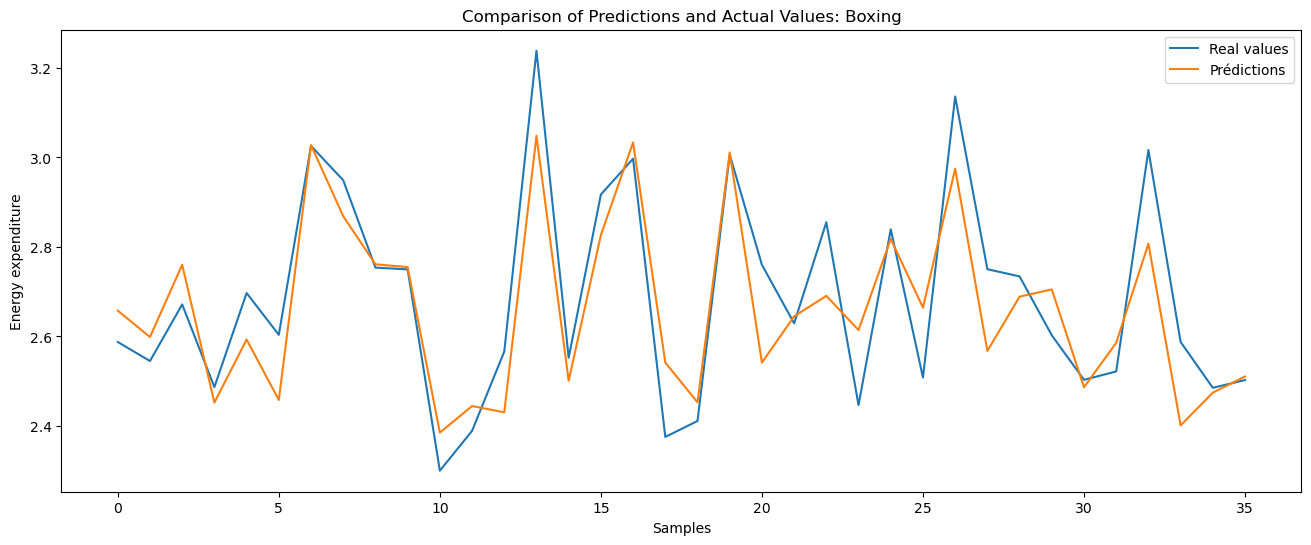

In [ ]:
# View predictions vs. actual values
plt.figure(figsize=(16, 6))
plt.plot(y_testB.values, label='Real values')
plt.plot(y_predB, label='Prédictions')
plt.legend()
plt.xlabel('Samples')
plt.ylabel('Energy expenditure')
plt.title('Comparison of Predictions and Actual Values: Boxing')
plt.show()